In [1]:
import math
from matplotlib import pyplot as plt

Variables

In [15]:
N = 15000

In [16]:
S = 10000
E = 3400
I = 1600

Parameters

In [17]:
a1 = 0.75
a2 = 0.75
eps = 1/11
mu = 1/(8.5*365)
b = 0.95
Kmi = 18082

In [18]:
data = [(0, S, E, I)]

Day One:

In [19]:
S = (S + a1*E + eps*a2*I)*math.pow(math.e, -mu)
E = (1 - a1)*E*math.pow(math.e, -mu)
I = eps*(1 - a2)*I*math.pow(math.e, -mu)
    

In [20]:
data.append((1, S, E, I))

In [21]:
data

[(0, 10000, 3400, 1600),
 (1, 12655.01127944234, 849.7260715460386, 36.35191749929577)]

In [22]:
for i in range(2, 90):
    N = S + E + I
    if i == 45:
        S = (S + 0.5*b*N*(1 - N/Kmi))*math.pow(math.e, -mu)
    else:
        S = S*math.pow(math.e, -mu)    
    E = E*math.pow(math.e, -mu)
    I = I*math.pow(math.e, -mu)
    data.append((i, S, E, I))
    

In [23]:
Is = [x[3] for x in data]
Es = [x[2] for x in data]
Ss = [x[1] for x in data]
Ts = [x[0] for x in data]

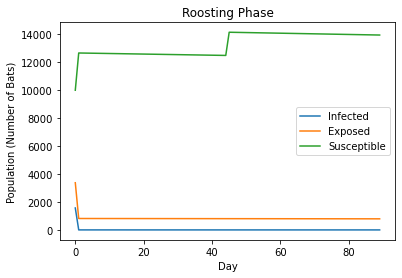

In [24]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot(Ts, Is, label='Infected')
ax.plot(Ts, Es, label='Exposed')
ax.plot(Ts, Ss, label='Susceptible')
plt.xlabel('Day')
plt.ylabel('Population (Number of Bats)')
plt.title("Roosting Phase")
plt.legend()
plt.savefig('roost.png', dpi=300)